In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LogisticRegression
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
import pandas as pd

In [2]:
import pandas as pd
data = pd.read_csv("INFY__EQ__NSE__NSE__15__MINUTE.csv")
data.head()
#removing all rows with missing values 
data = data.dropna()
data.to_csv("new.csv")

In [3]:
dates=[]
prices=[]
datesmonths=[]
datesdays=[]
datesmin=[]
dateshour=[]

Splitting the date into days, months and years

In [4]:
with open('new.csv') as csvfilenew:
    csvReadernew=csv.reader(csvfilenew)
    count=1
    #Spliting the column into individual features of Minutes, Hours, and Date
    for row in csvReadernew:
        if count !=1:
            datesmin.append(float(row[2].split('-')[2].split(" ")[1].split(":")[1]))
            dateshour.append(float(row[2].split('-')[2].split(" ")[1].split(":")[0]))
            datesmonths.append(int(row[2].split('-')[1]))  #done
            datesdays.append(int(row[2].split('-')[2].split(" ")[0])) #done
            dates.append(int(row[2].split('-')[0])) #done
            prices.append(float(row[3]))
        count=count+1


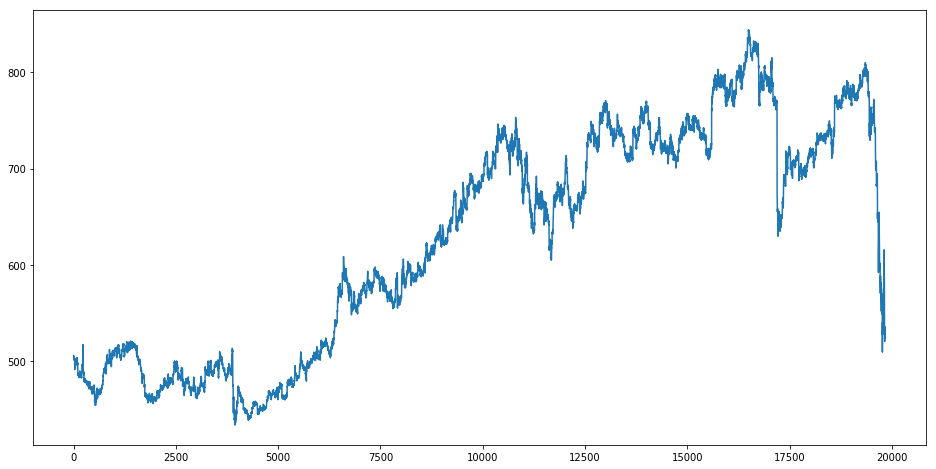

In [5]:
plt.figure(figsize=(16,8))
plt.plot(prices,label='Open Price history')

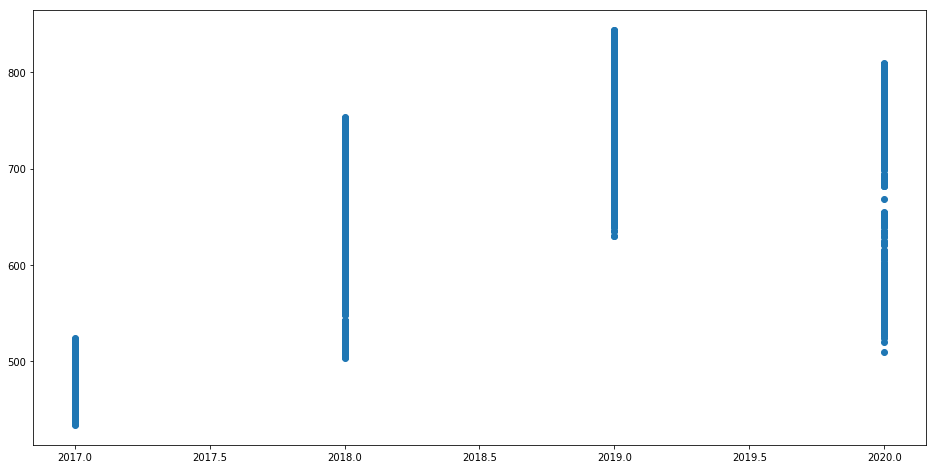

In [6]:
plt.figure(figsize=(16,8))
plt.scatter(dates,prices,label='months')

This implies that there is a gradual increase in opening prices

In [7]:
len(prices),len(dates)

(19841, 19841)

In [10]:
dict={'Day': datesdays,'Month': datesmonths,'Year': dates,'Hour': dateshour,'Mins':datesmin,'Prices': prices}

In [11]:
data=pd.DataFrame(dict)

In [12]:
data.head()

,Day,Month,Year,Hour,Mins,Prices
0,2,1,2017,9.0,15.0,505.73
1,2,1,2017,9.0,30.0,502.63
2,2,1,2017,9.0,45.0,502.58
3,2,1,2017,10.0,0.0,503.68
4,2,1,2017,10.0,15.0,503.50


In [15]:
Xtrain=data.drop('Prices',axis=True).iloc[200:].reset_index().drop('index',axis=True)
ytrain=data.Prices[200:].reset_index().drop('index',axis=True)

In [16]:
X_test = data.drop('Prices',axis=True).iloc[:200]
y_test = data.Prices[:200]

<h4>Linear Regression</h4>

In [17]:
reg=LinearRegression(normalize=True)
reg.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [18]:
preds=reg.predict(X_test)

<h4>Ridge Regression</h4>

In [19]:
Rreg=Ridge(normalize=True)
Rreg.fit(Xtrain,ytrain)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [20]:
Rpreds=Rreg.predict(X_test)

<h4>Lasso Regression</h4>

In [21]:
Lreg=Lasso(normalize=True)
Lreg.fit(Xtrain,ytrain)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [22]:
Lpreds=Lreg.predict(X_test)

<h4>SVR Kernel : 'Linear','RBF' Regression</h4>

In [23]:
svrlinear=SVR(kernel='linear',C=1000)
#svrp=SVR(kernel='poly',C=1000,degree=2)
svrRbf=SVR(kernel='rbf',C=1000,gamma=0.1)

In [24]:
svrlinear.fit(Xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
slpreds=svrlinear.predict(X_test)

In [ ]:
svrRbf.fit(Xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
srpreds=svrRbf.predict(X_test)

<h4>Visualization</h4>

In [ ]:
plt.plot(y_test,color='Black')
plt.plot(preds,color='Cyan')
plt.plot(Rpreds,color='Red')
plt.plot(Lpreds,color='Yellow')
plt.plot(slpreds,color='Blue')
plt.plot(srpreds,color='Green')
plt.legend()

<h4>Add predictions to DataFrame</h4>

In [ ]:
dict={'Day':datesdays[:200], 'Month': datesmonths[:200],'Year': dates[:200],'Actual': prices[:200],'LinearPredicts': preds.tolist(),'RidgePredicts': Rpreds.tolist(),'LassoPredicts': Lpreds.tolist(),'SVRLinear': slpreds.tolist(),'SVRrbf':srpreds.tolist()}

In [ ]:
data=pd.DataFrame(dict)

In [ ]:
data.head()

<h4>Calculate Error</h4>

In [ ]:
LinearError=[]
for i in range(len(data)):
    LinearError.append(data.Actual[i] - data.LinearPredicts[i])

In [ ]:
RidgeError=[]
for i in range(len(data)):
    RidgeError.append(data.Actual[i] - data.RidgePredicts[i])

In [ ]:
LassoError=[]
for i in range(len(data)):
    LassoError.append(data.Actual[i] - data.LassoPredicts[i])

In [ ]:
SVRLinearError=[]
for i in range(len(data)):
    SVRLinearError.append(data.Actual[i] - data.SVRLinear[i])

In [ ]:
SVRrbfError=[]
for i in range(len(data)):
    SVRrbfError.append(data.Actual[i] - data.SVRrbf[i])

In [ ]:
data['LinearError']=np.array(LinearError)

In [ ]:
data['RidgeError']=np.array(RidgeError)

In [ ]:
data['LassoError']=np.array(LassoError)

In [ ]:
data['SVRLinearError']=np.array(SVRLinearError)

In [ ]:
data['SVRrbfErrorr']=np.array(SVRrbfError)

In [ ]:
data.head()

<h4>Average Errors</h4>

In [ ]:
import math
sum=0
for i in range(len(data)):
    sum=sum+data.LinearError[i]**2
avg=sum/len(data)

print('Linear Regression RMSE Error:',math.sqrt(avg))
      
sum=0
for i in range(len(data)):
    sum=sum+data.RidgeError[i]**2
avg=sum/len(data)
print('Ridge Regression RMSERMSE Error:',math.sqrt(avg))
      
sum=0
for i in range(len(data)):
    sum=sum+data.LassoError[i]**2
avg=sum/len(data)
print('Lasso Regression RMSE Error:',math.sqrt(avg))
      
sum=0
for i in range(len(data)):
    sum=sum+data.SVRLinearError[i]**2
avg=sum/len(data)
print('SVR Linear Regression RMSE Error:',math.sqrt(avg))
      
sum=0
for i in range(len(data)):
    sum=sum+data.SVRrbfErrorr[i]**2
avg=sum/len(data)
print('SVR RBF Regression RMSE Error:',math.sqrt(avg))

<h4>Converting to .csv </h4>

In [ ]:
data.to_csv('Data.csv')